In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv("tc20171021.csv", on_bad_lines='skip')   #it is current car

In [3]:
car1 = pd.read_csv("true_car_listings.csv")  #it is used car csv

In [4]:
car.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [5]:
car1.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [6]:
car.shape,car1.shape

((1216250, 9), (852122, 8))

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216250 entries, 0 to 1216249
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Id       1216250 non-null  int64 
 1   Price    1216250 non-null  int64 
 2   Year     1216250 non-null  int64 
 3   Mileage  1216250 non-null  int64 
 4   City     1216250 non-null  object
 5   State    1216250 non-null  object
 6   Vin      1216250 non-null  object
 7   Make     1216250 non-null  object
 8   Model    1216250 non-null  object
dtypes: int64(4), object(5)
memory usage: 83.5+ MB


In [8]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [9]:
car['Year'].unique()

array([2015, 2016, 2014, 2017, 2013, 2006, 2003, 2007, 2005, 2012, 2011,
       2004, 2009, 2008, 2001, 2010, 2018, 2002, 2000, 1999, 1997, 1998],
      dtype=int64)

In [10]:
car1['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
      dtype=int64)

In [11]:
#merge two tables
car2 = pd.merge(car,car1)

In [12]:
car2.shape

(539145, 9)

In [13]:
car2.columns

Index(['Id', 'Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make',
       'Model'],
      dtype='object')

In [14]:
car2.drop('Id',axis=1,inplace=True)

In [15]:
car2.sample(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
465870,10490,2010,106042,Alpharetta,GA,5J6RE3H78AL006537,Honda,CR-V2WD
178578,19468,2015,59785,Long Island City,NY,WAUBFGFF1F1001637,Audi,A3Sedan
152572,44994,2017,4974,Harriman,NY,5UXWX9C34H0W72072,BMW,X3xDrive28i
43811,11200,2014,22929,Laurel,MD,1FADP3F20EL386292,Ford,FocusSedan
28694,35215,2014,38161,Sanford,NC,1FTFW1ETXEFC81892,Ford,F-1504WD
518524,127900,2014,7646,Greensboro,NC,WP0AD2A95ES166799,Porsche,911Turbo
133109,12000,2014,25459,Phoenix,AZ,1G1PC5SB3E7422336,Chevrolet,Cruze1LT
179888,18999,2012,29953,Puyallup,WA,WAUBFAFLXCN013826,Audi,A44dr
385540,15595,2016,42814,Louisville,KY,5NPE24AF6GH374197,Hyundai,Sonata2.4L
179970,25977,2013,42483,Tacoma,WA,19UUA9F59DA001302,Acura,TLSH-AWD


Here we can see that we are getting a group of cars that are sold with a price tag and we can also remove the duplicate columns from new car dataframe

In [16]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539145 entries, 0 to 539144
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    539145 non-null  int64 
 1   Year     539145 non-null  int64 
 2   Mileage  539145 non-null  int64 
 3   City     539145 non-null  object
 4   State    539145 non-null  object
 5   Vin      539145 non-null  object
 6   Make     539145 non-null  object
 7   Model    539145 non-null  object
dtypes: int64(3), object(5)
memory usage: 37.0+ MB


In [17]:
car2.describe()

,Price,Year,Mileage
count,539145.000000,539145.000000,5.391450e+05
mean,20752.166610,2013.025310,5.476343e+04
std,13583.398559,3.571959,4.343680e+04
min,1500.000000,1997.000000,5.000000e+00
25%,12746.000000,2012.000000,2.462500e+04
50%,17898.000000,2014.000000,4.185800e+04
75%,25995.000000,2015.000000,7.657800e+04
max,499500.000000,2018.000000,2.856196e+06


3.5 Statistical Analysis:

PRICE COLUMN
Calculate the mean, median, mode, and range of prices.
Plot a histogram of prices to visualize the distribution.
Calculate the standard deviation and variance of prices to measure the spread of the data.
Use a box plot to identify outliers in the data.

In [18]:
car2['Price'].describe()

count    539145.000000
mean      20752.166610
std       13583.398559
min        1500.000000
25%       12746.000000
50%       17898.000000
75%       25995.000000
max      499500.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

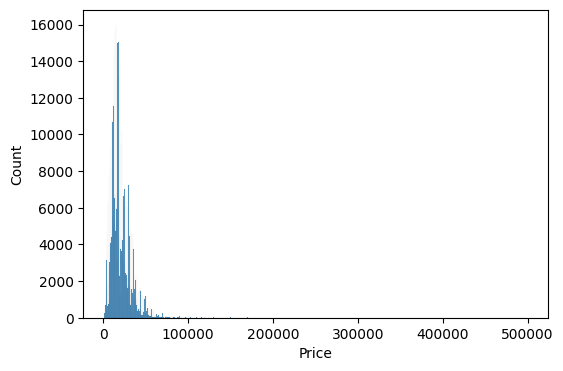

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(car2['Price'])

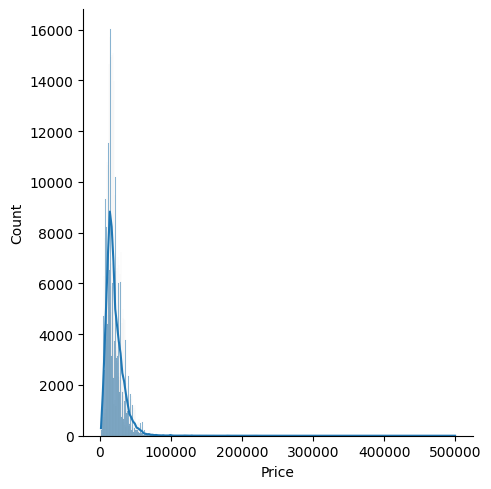

In [20]:
sns.displot(x=car2['Price'],kde=True)

In [21]:
car2['Price'].skew()

5.261882585706895

In [22]:
car2['Price'].var()

184508716.40350437

<AxesSubplot:ylabel='Price'>

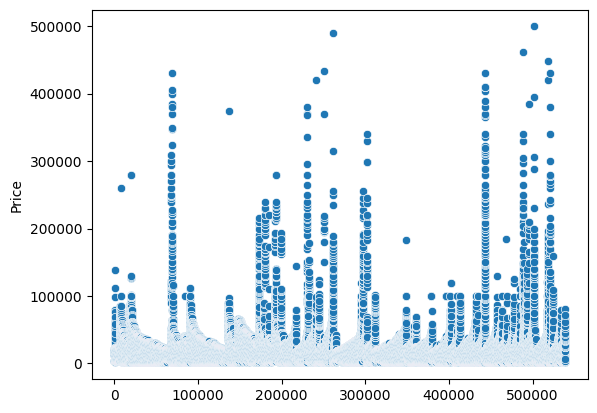

In [23]:
sns.scatterplot(car2['Price'])

<AxesSubplot:>

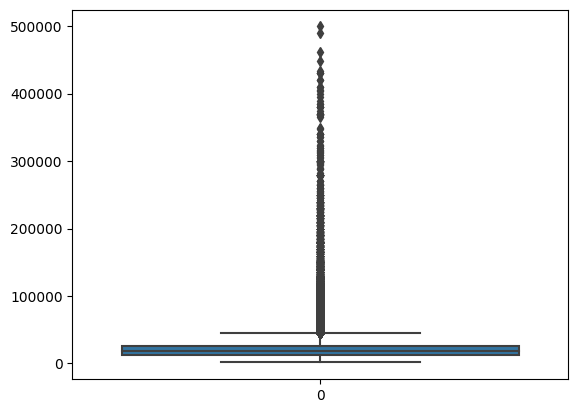

In [24]:
sns.boxplot(car2['Price'])

WE CAN SEE THAT OUR PRICE COLUMN IS SOME HOW LEFT SKEW AND WE CAN ALSO CHECK THAT OUR DATA HAVING SOME OUTLIERS.

<AxesSubplot:xlabel='Year', ylabel='Count'>

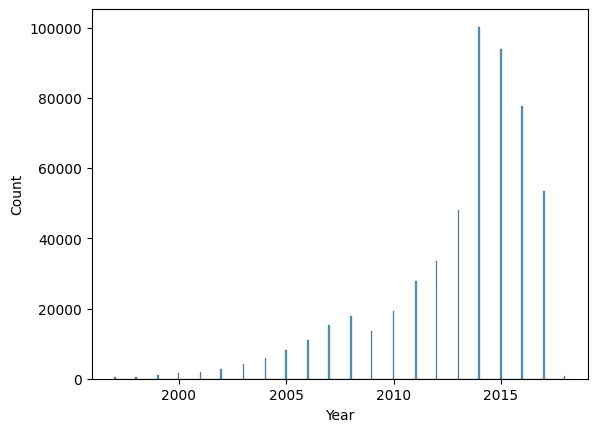

In [25]:
#YEAR
sns.histplot(car2['Year'])

In [26]:
print("The skeweness of the year column:",car2['Year'].skew())
print("the varience of the year columns is :",car2['Year'].var())

The skeweness of the year column: -1.4179861730183112
the varience of the year columns is : 12.758889301678638


WE CAN SEE THAT OUR DATA IS RIGHT SKEWED MOST OF THE CARS ARE FROM THE RANGE 2014-2018.

In [27]:
#city column
print(car2['City'].value_counts())
print("Total no of cities",car2['City'].nunique())

Houston                 8810
San Antonio             5115
Louisville              4392
Jacksonville            4004
Orlando                 3743
                        ... 
Los Banos                  3
Royston                    2
White River Junction       2
Holbrook                   2
Port Jervis                1
Name: City, Length: 2553, dtype: int64
Total no of cities 2553


In [28]:
x = car2['City'].value_counts()

<AxesSubplot:xlabel='City', ylabel='count'>

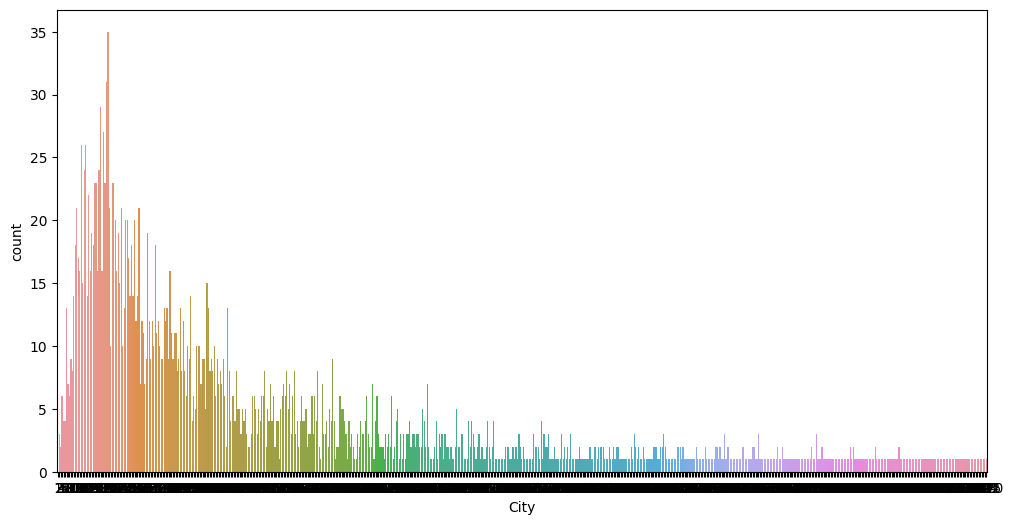

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x=x)

AS WE CAN SEE THTA OUR DATA CONTAINS SOME SKEWENESS IN IT MAJOR CITITES LIKE :
> Houston   :              8810
> San Antonio:             5115
> Louisville  :            4392
> Jacksonville :           4004    
> Orlando       :          3743               

>ARE THE LARGEST  HUB FOR CAR DEALING

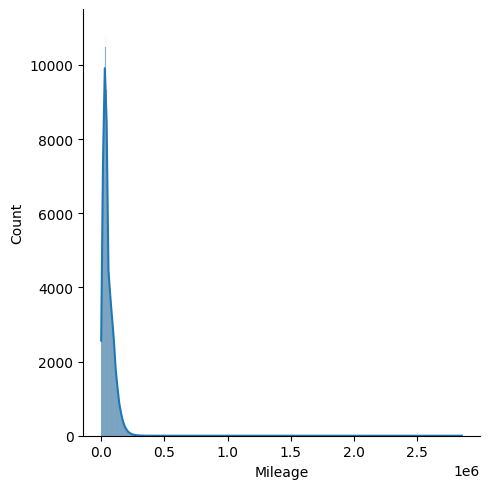

In [30]:
#Mileage
sns.displot(car2['Mileage'],kde=True)

<AxesSubplot:>

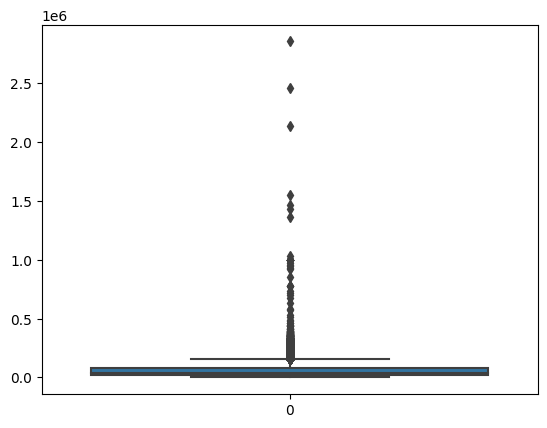

In [31]:
sns.boxplot(car2['Mileage'])

In [32]:
print("The skeweness of the year column:",car2['Mileage'].skew())
print("the varience of the year columns is :",car2['Mileage'].var())

The skeweness of the year column: 2.9931007358305592
the varience of the year columns is : 1886755278.7680202


In [33]:
#vin number
car2['Vin'].value_counts()

3FADP4BJ5GM148345    2
2G1WT58K781214125    2
KL8CB6S9XDC531399    2
1G1JC6SH8E4194609    2
1G1RA6E44EU129757    2
                    ..
WAUAFAFL8EN041946    1
WAUBFAFL7FN024111    1
WAUDF78E58A168115    1
WAUSF78K29N067962    1
YV4A22PL3H1186162    1
Name: Vin, Length: 539126, dtype: int64

In [34]:
car2['Vin'].nunique()

539126

In [35]:
print(car2['Make'].value_counts())
print("total numbe rof car's maker:",car2['Make'].nunique())

Chevrolet        65115
Ford             62640
Toyota           45441
Nissan           42834
BMW              32415
Honda            30800
Jeep             24204
Hyundai          23050
Dodge            22579
GMC              18008
Kia              17281
Mercedes-Benz    16787
Volkswagen       14713
Audi             12618
Acura            11049
Lexus            10891
Chrysler         10201
Subaru           10099
Cadillac          9376
Mazda             8684
Buick             7654
INFINITI          7366
Ram               6376
Lincoln           4396
Volvo             2985
Mitsubishi        2787
MINI              2678
Land              2505
Porsche           2492
Scion             2024
Pontiac           1356
Jaguar            1290
FIAT              1194
Mercury            815
Saturn             778
HUMMER             654
Maserati           634
smart              504
Bentley            367
Suzuki             263
Saab               203
Ferrari            192
Tesla              151
Aston      

In [36]:
print(car2['Model'].value_counts())
print("total numbe rof car's maker:",car2['Model'].nunique())

Silverado       15811
3               11131
Grand           10898
Accord           8484
F-1504WD         7358
                ...  
MulsanneBase        1
Mulsanne4dr         1
R85.2               1
S4Prestige          1
V70R                1
Name: Model, Length: 2579, dtype: int64
total numbe rof car's maker: 2579


In [37]:
#duplicate
car2.duplicated().sum()

19

THERE ARE A TOTAL OF 19 DUPLICATE COLUMNS IN OUR DATASET  

In [38]:
#REMOVING THE DUPLICATES COLUMNS FROM THE DATASET
car2.drop_duplicates(inplace=True)

In [39]:
print("Total number of states:",car2['State'].nunique())
print(car2['State'].value_counts())

Total number of states: 59
 TX    61827
 CA    52698
 FL    49684
 GA    24219
 IL    23615
 NC    23433
 VA    21956
 NY    18149
 NJ    17353
 PA    17291
 AZ    14831
 CO    14653
 OH    14326
 WA    13975
 TN    11602
 MA    10752
 MD    10499
 IN     9563
 MO     9341
 KY     9195
 AL     8084
 CT     6713
 MI     6700
 OR     6573
 MN     6550
 SC     6436
 UT     6270
 WI     6171
 LA     5574
 OK     5526
 KS     4870
 NV     4575
 MS     4076
 AR     3961
 NH     3695
 NM     3141
 NE     2983
 IA     2799
 ID     2281
 HI     2146
 DE     1449
 MT     1350
 ME     1346
 AK     1219
 RI     1124
 WV      984
 SD      883
 VT      724
 ND      553
 Fl      525
 WY      396
 Va      121
 Md       92
 ga       77
 Ga       65
 Az       52
 Oh       35
 DC       23
 Ca       22
Name: State, dtype: int64


Excluding relatively not used cars
>Here we can check for the cars that are not drove more than 1000 mile are prety much new we can exclude them from our dataset 

In [40]:
car_m = car2[car2['Mileage'] < 3000]

In [41]:
car_m.shape

(11011, 8)

In [42]:
#Car Usage Levels
car2.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Price'>

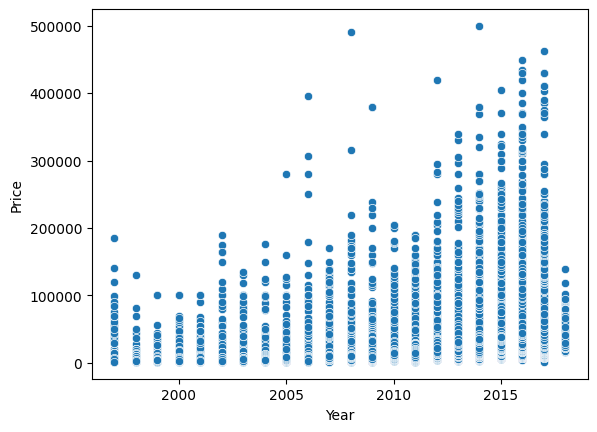

In [43]:
sns.scatterplot(y=car2['Price'],x=car2['Year'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Buick'),
  Text(1, 0, 'Acura'),
  Text(2, 0, 'Alfa'),
  Text(3, 0, 'Aston'),
  Text(4, 0, 'Audi'),
  Text(5, 0, 'Bentley'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Cadillac'),
  Text(8, 0, 'Chevrolet'),
  Text(9, 0, 'Chrysler'),
  Text(10, 0, 'Dodge'),
  Text(11, 0, 'FIAT'),
  Text(12, 0, 'Ford'),
  Text(13, 0, 'GMC'),
  Text(14, 0, 'Honda'),
  Text(15, 0, 'Genesis'),
  Text(16, 0, 'Geo'),
  Text(17, 0, 'Freightliner'),
  Text(18, 0, 'Ferrari'),
  Text(19, 0, 'Fisker'),
  Text(20, 0, 'AM'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Kia'),
  Text(23, 0, 'Lamborghini'),
  Text(24, 0, 'Land'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Lincoln'),
  Text(27, 0, 'Lotus'),
  Text(28, 0, 'Maserati'),
  Text(29, 0, 'Maybach'),
  Te

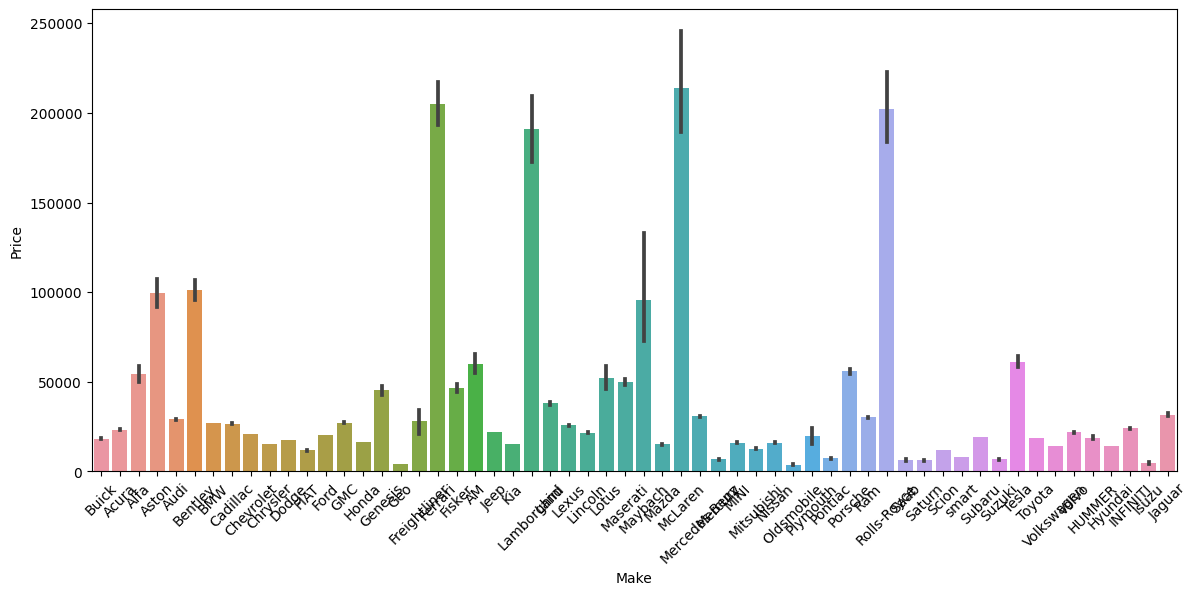

In [44]:
plt.figure(figsize=(14,6))
sns.barplot(x=car2['Make'],y=car2['Price'])
plt.xticks(rotation=45)

In [45]:
#create a pivot table for the state and mileage column
s_m = car2.pivot_table(index='State',values='Mileage')

<AxesSubplot:ylabel='State'>

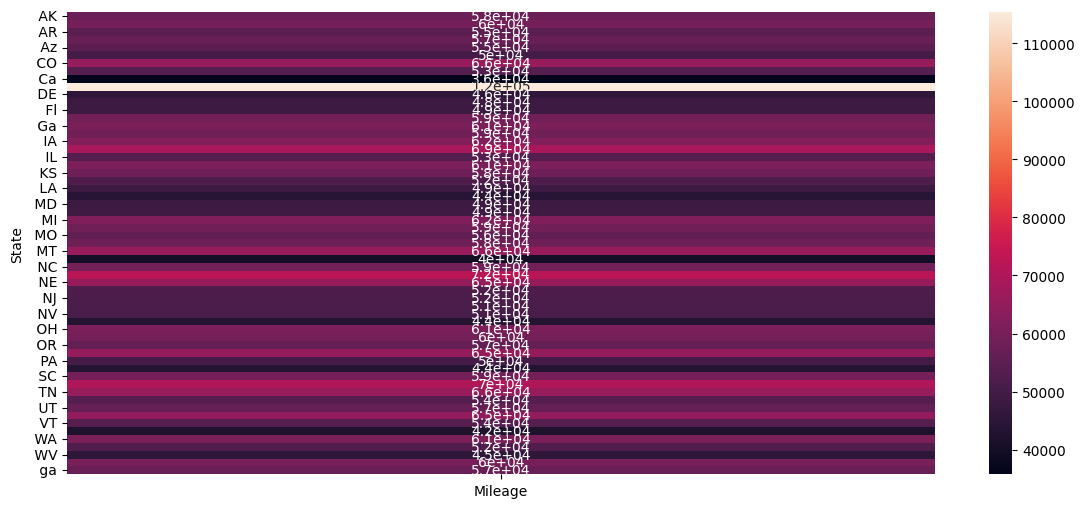

In [46]:
plt.figure(figsize=(14,6))
sns.heatmap(s_m,annot=True)

In [47]:
car2[['Model','Mileage']].value_counts()

Model       Mileage
XT5FWD      10         37
Transit     10         32
Super       10         29
XT5FWD      11         27
Q52.0       7500       19
                       ..
Equinox4dr  152558      1
            150488      1
            150113      1
            149558      1
xDManual    78477       1
Length: 530446, dtype: int64

In [48]:
corr = car2.corr()

<AxesSubplot:>

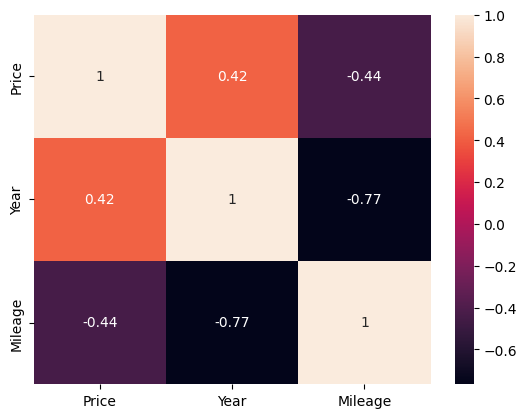

In [49]:
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Year', ylabel='Price'>

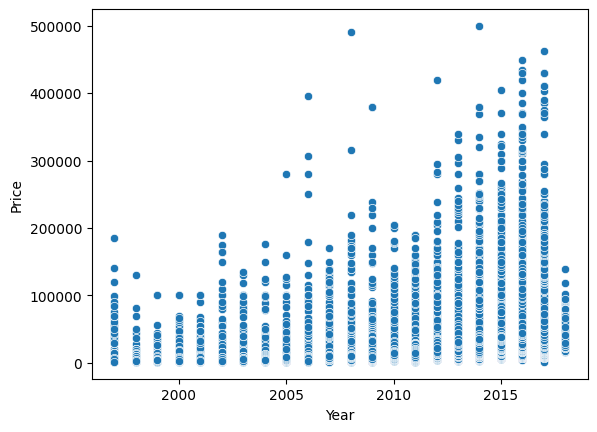

In [50]:
sns.scatterplot(y=car2['Price'],x=car2['Year'])

In [51]:
car2

,Price,Year,Mileage,City,State,Vin,Make,Model
0,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
1,16895,2015,21026,Souderton,PA,KL4CJASB9FB190502,Buick,EncoreFWD
2,15995,2015,20496,McDonough,GA,KL4CJBSB2FB101567,Buick,EncoreConvenience
3,17991,2016,14806,Tucson,AZ,KL4CJASB7GB620898,Buick,EncoreFWD
4,3950,2003,176935,Elkhart,IN,3G5DA03E93S607122,Buick,RendezvousCXL
...,...,...,...,...,...,...,...,...
539140,54995,2017,9631,Berwyn,PA,YV1A22MK2H1013239,Volvo,S90T6
539141,54995,2017,10913,Berwyn,PA,YV1A22ML5H1004169,Volvo,S90T6
539142,61990,2017,2201,Winston Salem,NC,YV1A22ML0H1006850,Volvo,S90T6
539143,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8


<AxesSubplot:xlabel='Price', ylabel='Mileage'>

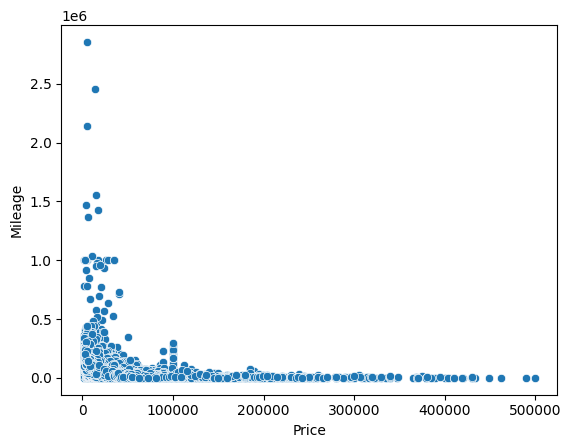

In [52]:
sns.scatterplot(x=car2['Price'],y=car2['Mileage'])

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

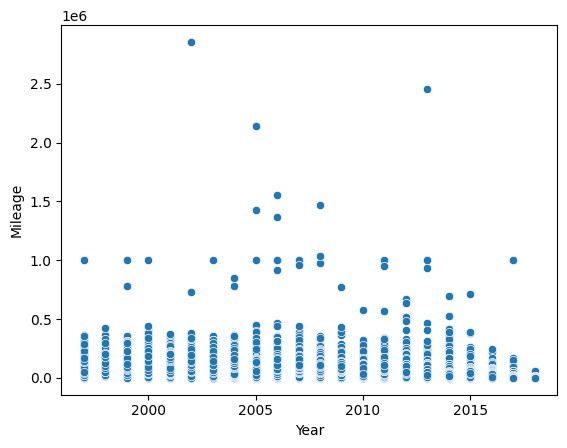

In [53]:
sns.scatterplot(x=car2['Year'],y=car2['Mileage'])

Text(0.5, 0, 'city_name')

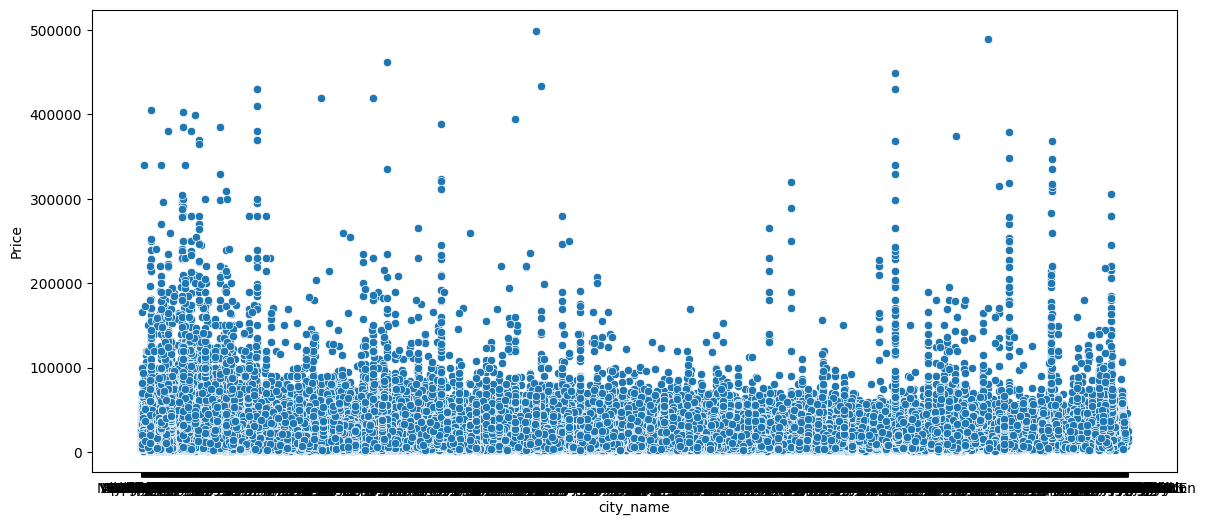

In [54]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=car2['City'],y=car2['Price'])
plt.xlabel('city_name')

In [55]:
car2.to_csv('merged_car_data.csv', index=False)

In [56]:
car2.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [57]:
from scipy.stats import ttest_ind

# Create two groups based on the Year column: new cars and old cars
new_cars = car2[car2['Year'] >= 2016]['Price']
old_cars = car2[car2['Year'] < 2016]['Price']

# Perform a t-test on the two groups based on the City column
t_stat, p_value = ttest_ind(new_cars[car2['City'] == 'New Orleans'], old_cars[car2['City'] == 'New Orleans'])

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 3.34
P-value: 0.0010


For Further Analysis refer to the power-bi dash board

In [58]:
car2.shape

(539126, 8)

In [62]:
car2.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [65]:
car2['State'].nunique()

59

In [66]:
car2['City'].nunique()

2553

In [67]:
car2['Make'].nunique()

58

In [68]:
car2['Model'].nunique()

2579

In [75]:
car2['Model'].value_counts()

Silverado       15810
3               11131
Grand           10898
Accord           8484
F-1504WD         7358
                ...  
MulsanneBase        1
Mulsanne4dr         1
R85.2               1
S4Prestige          1
V70R                1
Name: Model, Length: 2579, dtype: int64